# U.S. Medical Insurance Costs

# Goals for this project

Suggested by Codecademy:

 - Find out the average age of the patients in the datase <br>
 - Analyze where a majority of the individuals are from <br>
 - Look at the different costs between smokers vs. non-smokers <br>
 - Figure out what the average age is for someone who has at least one child in this dataset. <br>

Self-included:

 - Determine which regions have the highest charges <br>
 - Affect of sex on insurance premiums <br>
 - Family Size impact on insurance premiums. <br>

### Purpose of this project

I intend to use this project as an exercise in using the tools learned in the "Data Science Foundations" skill path from Codecademy. 
 - Feel free to message me about critiques/feedback on ways to improve!

In [21]:
# import csv and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv("insurance.csv")
print(df.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


1. Find out the average age of the pations in the database

In [41]:
average_age = np.mean(df.age)
print(average_age)

39.20702541106129


2. Analyze where a majority of the individuals are from

In [23]:
print(df.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


 - Out of the four regions, southeast appears to have the most insurance holders in this dataset. However, it isn't a large majority

Text(0.5, 1.0, 'Region Breakdown of U.S. Medical Insurance Dataset')

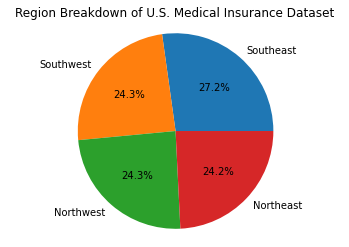

In [24]:
pie_labels = ['Southeast', 'Southwest', 'Northwest', 'Northeast']
plt.pie(df.region.value_counts(), labels = pie_labels, autopct = '%0.1f%%')
plt.axis('equal')
plt.title('Region Breakdown of U.S. Medical Insurance Dataset')

3. Look at the different costs between smokers vs. non-smokers

In [25]:
num_smoker = len(df.smoker[df.smoker == 'yes'])
num_nonsmoker = len(df.smoker[df.smoker == 'no'])

print(num_smoker)
print(num_nonsmoker)

274
1064


 - Smokers make up ~20.48 of the sample population
 - The next step is to find the avg cost of insurance for smokers and non-smokers.

In [39]:
avg_cost_smoking = df.groupby('smoker')['charges'].median()
print(avg_cost_smoking)

smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64


- A better way to view this relationship 
     - The non-smokers are going to be heavily right-skewed. 

<AxesSubplot:xlabel='charges', ylabel='Count'>

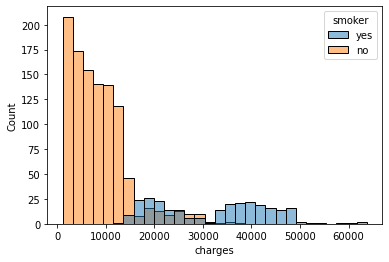

In [27]:
sns.histplot(df, x = 'charges', hue = df.smoker)

4. Figure out what the average age is for someone who has at least one child in this dataset.

In [28]:
print(average_age)

39.20702541106129


In [29]:
print(max(df.children))

5


In [38]:
age_per_child = (df.groupby('children')['age'].median())
print(age_per_child)

children
0    36.0
1    40.0
2    40.0
3    41.0
4    39.0
5    39.0
Name: age, dtype: float64


5. Determine which regions have the highest charges

Text(0.5, 1.0, 'Avg. Regional Charges for U.S. Medical Insurance')

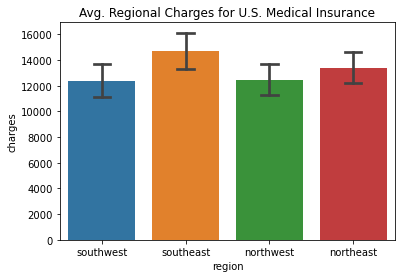

In [31]:
sns.barplot(x = 'region', y = 'charges', data = df, capsize=.2)
plt.title('Avg. Regional Charges for U.S. Medical Insurance')

6. Affect of sex on insurance premiums

In [32]:
model = sm.OLS.from_formula('charges ~ sex', df).fit()
print(model.params)

Intercept      12569.578844
sex[T.male]     1387.172334
dtype: float64


This OLS model suggests that the mean insurance payment for a female would be $12,569.58. An average male would be pay ~$13,956 in insurance charges. If I were to spend more time on this project, I would check the assumptions made in this model.

<AxesSubplot:xlabel='charges', ylabel='Count'>

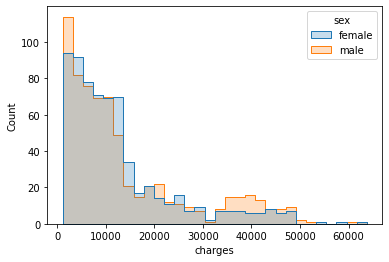

In [33]:
sns.histplot(df, x = 'charges', hue = 'sex', element="step")

7. Family Size impact on insurance premiums.

In [37]:
family_size_charges = (df.groupby('children')['charges'].median())
print(family_size_charges)

children
0     9856.95190
1     8483.87015
2     9264.97915
3    10600.54830
4    11033.66170
5     8589.56505
Name: charges, dtype: float64
